2402226865 - 
Bagas Aditya Putra

# **Linear Regression**

In [1]:
!wget https://raw.githubusercontent.com/bagasap10/S2-ML/main/ASG_week2/dataset_linear_regression.csv

--2022-12-09 13:06:55--  https://raw.githubusercontent.com/bagasap10/S2-ML/main/ASG_week2/dataset_linear_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210 [text/plain]
Saving to: ‘dataset_linear_regression.csv.3’

dataset_linear_regr 100%[===================>]     210  --.-KB/s    in 0s      

2022-12-09 13:06:55 (7.78 MB/s) - ‘dataset_linear_regression.csv.3’ saved [210/210]



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset1 = pd.read_csv("/content/dataset_linear_regression.csv")
dataset1

,nitrogen_fertilizer(mg),corn_plant_weight(gr)
0,0,41
1,0,54
2,0,91
3,0,70
4,20,127
5,20,282
6,20,149
7,20,259
8,40,316
9,40,240


In [4]:
dataset1.describe()

,nitrogen_fertilizer(mg),corn_plant_weight(gr)
count,24.000000,24.000000
mean,50.000000,348.250000
std,34.891135,190.234923
min,0.000000,41.000000
25%,20.000000,217.250000
50%,50.000000,359.500000
75%,80.000000,499.500000
max,100.000000,644.000000


slope b1 is 5.268571428571429
intercept b0 is 84.82142857142856


Text(0, 0.5, 'Dependent variable y')

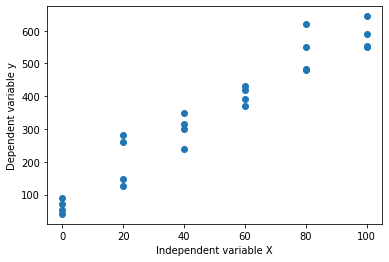

In [5]:
x = dataset1['nitrogen_fertilizer(mg)']
y = dataset1['corn_plant_weight(gr)']
n = np.size(x)

x_mean = np.mean(x)
y_mean = np.mean(y)

x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)
  
plt.scatter(x,y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

Text(0, 0.5, 'y')

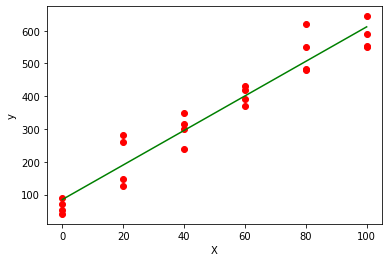

In [6]:
y_pred = b1 * x + b0

plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')


## a. Find the regression equation best fitted to the data and compute its Mean Squared Error (MSE)!

In [7]:

error = y - y_pred
se = np.sum(error**2)
print('squared error is', se)
  
mse = se/n 
print('mean squared error is', mse)
  
rmse = np.sqrt(mse)
print('root mean square error is', rmse)
  
SSt = np.sum((y - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 55134.84285714287
mean squared error is 2297.2851190476194
root mean square error is 47.93000228507839
R square is 0.9337603835179087


In [8]:
x2 = dataset1['nitrogen_fertilizer(mg)']
x2 = x2.values.reshape(-1,1)

regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x2, y)

# Predict
y_predicted = regression_model.predict(x2)

# model evaluation
mse=mean_squared_error(y,y_predicted)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [5.26857143]
Intercept: 84.82142857142856
MSE: 2297.2851190476194
Root mean squared error:  47.93000228507839
R2 score:  0.9337603835179087


## b. Using the equation from question (a), what is the predicted weight of the corn plant if 95 mg of nitrogen fertilizer is used?


In [9]:
y_predict = regression_model.coef_ * 95 + regression_model.intercept_
print(y_predict)

[585.33571429]


# **Decision Tree**

In [10]:
!wget https://raw.githubusercontent.com/bagasap10/S2-ML/main/ASG_week2/dataset_decision_tree.csv

--2022-12-09 13:06:57--  https://raw.githubusercontent.com/bagasap10/S2-ML/main/ASG_week2/dataset_decision_tree.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316 [text/plain]
Saving to: ‘dataset_decision_tree.csv.3’

dataset_decision_tr 100%[===================>]     316  --.-KB/s    in 0s      

2022-12-09 13:06:57 (13.4 MB/s) - ‘dataset_decision_tree.csv.3’ saved [316/316]



In [11]:
dataset2 = pd.read_csv("/content/dataset_decision_tree.csv")
dataset2

,patient,fever,vomiting,diarrhea,shivering,class
0,P1,no,no,no,no,healthy (H)
1,P2,average,no,no,no,influenza (I)
2,P3,high,no,no,yes,influenza (I)
3,P4,high,yes,yes,no,salmonella poisoning (S)
4,P5,average,no,yes,no,salmonella poisoning (S)
5,P6,no,yes,yes,no,bowel inflammation (B)
6,P7,average,yes,yes,no,bowel inflammation (B)


In [12]:
fever = {'no': 0, 'average': 1, 'high': 2}
dataset2['fever'] = dataset2['fever'].map(fever)

yes_no = {'no': 0, 'yes': 1}
dataset2['vomiting'] = dataset2['vomiting'].map(yes_no)
dataset2['diarrhea'] = dataset2['diarrhea'].map(yes_no)
dataset2['shivering'] = dataset2['shivering'].map(yes_no)

#classes = {'healthy (H)': 'H'
#           , 'influenza (I)': 'I'
#           , 'salmonella poisoning (S)': 'S'
#           , 'bowel inflammation (B)': 'B'}
#dataset2['class'] = dataset2['class'].map(classes)

print(dataset2)

  patient  fever  vomiting  diarrhea  shivering                     class
0      P1      0         0         0          0               healthy (H)
1      P2      1         0         0          0             influenza (I)
2      P3      2         0         0          1             influenza (I)
3      P4      2         1         1          0  salmonella poisoning (S)
4      P5      1         0         1          0  salmonella poisoning (S)
5      P6      0         1         1          0    bowel inflammation (B)
6      P7      1         1         1          0    bowel inflammation (B)


In [13]:
X = dataset2[["fever", "vomiting","diarrhea","shivering"]]
Y = dataset2["class"]

## a. Construct a decision tree using Information Gain (IG) as the main criteria!

[Text(0.4444444444444444, 0.875, 'diarrhea <= 0.5\ngini = 0.735\nsamples = 7\nvalue = [2, 1, 2, 2]'),
 Text(0.2222222222222222, 0.625, 'fever <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.6666666666666666, 0.625, 'vomiting <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 0, 2]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.7777777777777778, 0.375, 'fever <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 0, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]')]

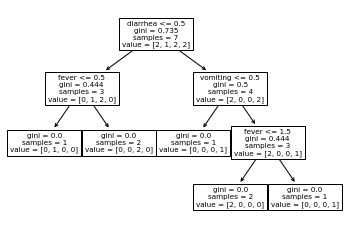

In [14]:
DST = DecisionTreeClassifier()
DST = DST.fit(X, Y)

tree.plot_tree(DST, feature_names=['fever','vomiting','diarrhea','shivering'])

## b. If a person has high fever and diarrhea, does not vomit nor shiver, what diagnosis would probably be given to him?

In [15]:
predict = [[2,0,1,0]]
print(DST.predict(predict))

['salmonella poisoning (S)']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
